# Подготовка окружения

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 20)

# Загрузка данных

In [2]:
BOX_SCORES_PATH = "NBA Player Box Score Stats(1950 - 2022).csv"
PLAYER_STATS_PATH = "NBA Player Stats(1950 - 2022).csv"
SALARIES_PATH = "NBA Salaries(1990-2023).csv"
PAYROLL_PATH = "NBA Payroll(1990-2023).csv"

box_scores = pd.read_csv(BOX_SCORES_PATH)
player_stats = pd.read_csv(PLAYER_STATS_PATH)
salaries = pd.read_csv(SALARIES_PATH)
payroll = pd.read_csv(PAYROLL_PATH)

# Анализ структуры данных


In [3]:
def print_df_info(title: str, df):
    sep = "=" * 80
    print(f"\n{sep}\n{title}\n{sep}")
    df.info()


datasets = {
    "BOX SCORES — Player × Game level data": box_scores,
    "PLAYER STATS — Player × Season level data": player_stats,
    "SALARIES — Player salaries by season": salaries,
    "PAYROLL — Team payroll data": payroll,
}

for title, df in datasets.items():
    print_df_info(title, df)


BOX SCORES — Player × Game level data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309778 entries, 0 to 1309777
Data columns (total 29 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1309778 non-null  int64  
 1   Season           1309778 non-null  int64  
 2   Game_ID          1309778 non-null  int64  
 3   PLAYER_NAME      1309778 non-null  object 
 4   Team             1309778 non-null  object 
 5   GAME_DATE        1309778 non-null  object 
 6   MATCHUP          1309778 non-null  object 
 7   WL               1309625 non-null  object 
 8   MIN              1309778 non-null  int64  
 9   FGM              1309778 non-null  int64  
 10  FGA              1225111 non-null  float64
 11  FG_PCT           965197 non-null   float64
 12  FG3M             1007039 non-null  float64
 13  FG3A             997931 non-null   float64
 14  FG3_PCT          883922 non-null   float64
 15  FTM              1309778 no

# Описание данных

## 1. Описание набора данных статистики игроков на уровне матчей

**(BOX SCORES — Player × Game level data)**

**Таблица 1 — Структура и описание переменных набора данных статистики игроков NBA на уровне матчей**

| Наименование переменной | Тип данных       | Описание                                                                              |
| ----------------------- | ---------------- | ------------------------------------------------------------------------------------- |
| `Season`                | целочисленный    | Год начала соответствующего сезона NBA                                                |
| `Game_ID`               | целочисленный    | Уникальный идентификатор матча                                                        |
| `PLAYER_NAME`           | строковый        | Фамилия и имя игрока                                                                  |
| `Team`                  | строковый        | Команда, за которую выступал игрок в данном матче                                     |
| `GAME_DATE`             | строковый (дата) | Дата проведения матча                                                                 |
| `MATCHUP`               | строковый        | Обозначение матча, включающее информацию о сопернике и статусе домашней/гостевой игры |
| `WL`                    | строковый        | Результат матча для команды игрока (победа или поражение)                             |
| `MIN`                   | целочисленный    | Количество минут, проведённых игроком на площадке                                     |
| `FGM`                   | целочисленный    | Количество реализованных бросков с игры                                               |
| `FGA`                   | вещественный     | Количество попыток бросков с игры                                                     |
| `FG_PCT`                | вещественный     | Процент реализации бросков с игры                                                     |
| `FG3M`                  | вещественный     | Количество реализованных трёхочковых бросков                                          |
| `FG3A`                  | вещественный     | Количество попыток трёхочковых бросков                                                |
| `FG3_PCT`               | вещественный     | Процент реализации трёхочковых бросков                                                |
| `FTM`                   | целочисленный    | Количество реализованных штрафных бросков                                             |
| `FTA`                   | вещественный     | Количество попыток штрафных бросков                                                   |
| `FT_PCT`                | вещественный     | Процент реализации штрафных бросков                                                   |
| `OREB`                  | вещественный     | Количество подборов в нападении                                                       |
| `DREB`                  | вещественный     | Количество подборов в защите                                                          |
| `REB`                   | вещественный     | Общее количество подборов                                                             |
| `AST`                   | вещественный     | Количество результативных передач                                                     |
| `STL`                   | вещественный     | Количество перехватов                                                                 |
| `BLK`                   | вещественный     | Количество блок-шотов                                                                 |
| `TOV`                   | вещественный     | Количество потерь                                                                     |
| `PF`                    | вещественный     | Количество персональных фолов                                                         |
| `PTS`                   | целочисленный    | Количество набранных очков                                                            |
| `PLUS_MINUS`            | вещественный     | Разница очков команды при нахождении игрока на площадке                               |
| `VIDEO_AVAILABLE`       | целочисленный    | Индикатор наличия видеозаписи матча                                                   |

---

## 2. Описание набора данных сезонной статистики игроков

**(PLAYER STATS — Player × Season level data)**

**Таблица 2 — Структура и описание переменных набора данных сезонной статистики игроков**

| Переменная                   | Тип данных    | Описание                                        |
| ---------------------------- | ------------- | ----------------------------------------------- |
| `Season`                     | целочисленный | Год начала сезона                               |
| `Player`                     | строковый     | Фамилия и имя игрока                            |
| `Pos`                        | строковый     | Основная игровая позиция                        |
| `Age`                        | вещественный  | Возраст игрока в рассматриваемом сезоне         |
| `Tm`                         | строковый     | Команда игрока                                  |
| `G`                          | вещественный  | Количество сыгранных матчей                     |
| `GS`                         | вещественный  | Количество матчей, начатых в стартовом составе  |
| `MP`                         | вещественный  | Общее количество минут, проведённых на площадке |
| `FG`, `FGA`, `FG%`           | вещественный  | Показатели бросков с игры                       |
| `3P`, `3PA`, `3P%`           | вещественный  | Показатели трёхочковых бросков                  |
| `2P`, `2PA`, `2P%`           | вещественный  | Показатели двухочковых бросков                  |
| `eFG%`                       | вещественный  | Эффективный процент реализации бросков          |
| `FT`, `FTA`, `FT%`           | вещественный  | Показатели штрафных бросков                     |
| `ORB`, `DRB`, `TRB`          | вещественный  | Показатели подборов                             |
| `AST`, `STL`, `BLK`          | вещественный  | Показатели результативных действий              |
| `TOV`                        | вещественный  | Количество потерь                               |
| `PF`                         | вещественный  | Количество персональных фолов                   |
| `PTS`                        | вещественный  | Общее количество очков за сезон                 |

---

## 3. Описание набора данных зарплат игроков

**(SALARIES — Player salaries)**

**Таблица 3 — Переменные набора данных зарплат игроков**

| Переменная           | Тип данных    | Описание                            |
| -------------------- | ------------- | ----------------------------------- |
| `playerName`         | строковый     | Фамилия и имя игрока                |
| `seasonStartYear`    | целочисленный | Год начала сезона                   |
| `salary`             | строковый     | Номинальная заработная плата игрока |
| `inflationAdjSalary` | строковый     | Заработная плата с учётом инфляции  |

---

## 4. Описание набора данных командных бюджетов

**(PAYROLL — Team payroll)**

**Таблица 4 — Переменные набора данных командных бюджетов**

| Переменная            | Тип данных    | Описание                                  |
| --------------------- | ------------- | ----------------------------------------- |
| `team`                | строковый     | Наименование команды                      |
| `seasonStartYear`     | целочисленный | Год начала сезона                         |
| `payroll`             | строковый     | Совокупный фонд оплаты труда команды      |
| `inflationAdjPayroll` | строковый     | Фонд оплаты труда с поправкой на инфляцию |

# Общая логика объединения наборов данных

Используемые в работе наборы данных имеют **разную гранулярность** и **разное назначение**, поэтому их объединение выполняется **не в один шаг**, а **поэтапно**, с формированием нескольких аналитических представлений данных.

Объединение выполняется по следующим принципам:

* статистика игроков на уровне матчей и сезонов объединяется **по имени игрока и сезону**;
* финансовые показатели игроков и команд присоединяются **на уровне сезона**;
* командные бюджеты используются как **контекстная информация**, дополняющая показатели игроков.

---

## Гранулярность исходных таблиц

| Набор данных | Уровень агрегации |
| ------------ | ----------------- |
| BOX SCORES   | Игрок – матч      |
| PLAYER STATS | Игрок – сезон     |
| SALARIES     | Игрок – сезон     |
| PAYROLL      | Команда – сезон   |

Из-за различной гранулярности **формируется два итоговых датасета**, а не один.

---

## Формирование датасета «Игрок – сезон»

### Назначение

Используется для:

* регрессионных моделей эффективности;
* кластеризации игровых профилей;
* оценки ценности игрока.

### Источники

* `PLAYER STATS`
* `SALARIES`
* `PAYROLL`

### Ключи объединения

* `Player` ↔ `playerName`
* `Season` ↔ `seasonStartYear`

### Логика объединения

```text
PLAYER STATS
      ⨝ (Player, Season)
SALARIES
      ⨝ (Team, Season)
PAYROLL
```
---

## Формирование датасета «Игрок – матч»

### Назначение

Используется для:

* анализа динамики игровой формы;
* построения временных рядов;
* рекуррентных нейронных сетей.

### Источники

* `BOX SCORES`
* `PLAYER STATS` — как статические признаки

### Ключи объединения

* `PLAYER_NAME` ↔ `Player`
* `Season`

### Логика объединения

```text
BOX SCORES
      ⨝ (Player, Season)
PLAYER STATS
```
---

## Почему нельзя объединять всё в одну таблицу

Объединение всех четырёх таблиц в единый набор данных приводит к:

* дублированию сезонных и финансовых показателей для каждого матча;
* искажению статистических распределений;
* утечке информации при обучении моделей.

### Корректное решение

* формировать **несколько целевых датасетов**
* использовать каждый набор строго под свою задачу

---

## Итоговая схема объединения

```text
                PLAYER STATS
                     |
                     | (Player, Season)
                     |
               +-----+-----+
               |           |
           SALARIES     PAYROLL
               |
               |
        PLAYER–SEASON DATASET


BOX SCORES
     |
     | (Player, Season)
     |
PLAYER–GAME DATASET
```


In [8]:
def build_datasets(box_scores, player_stats, salaries, payroll):
    drop_idx = lambda df: df.loc[:, ~df.columns.str.startswith("Unnamed")]

    # --- Player × Season (stats + salaries + payroll) ---
    ps = drop_idx(player_stats).rename(columns={"Player": "player", "Season": "season", "Tm": "team"})
    sal = drop_idx(salaries).rename(columns={"playerName": "player", "seasonStartYear": "season"})
    pr = drop_idx(payroll).rename(columns={"seasonStartYear": "season"})

    player_season_df = (
        ps.merge(sal, on=["player", "season"], how="left")
        .merge(pr, on=["team", "season"], how="left")
    )

    # --- Player × Game ---
    bg = drop_idx(box_scores).rename(columns={
        "PLAYER_NAME": "player",
        "Season": "season",
        "Team": "team",
        "GAME_DATE": "game_date",
        "WL": "result",
        "MIN": "minutes"
    })

    bg["game_date"] = pd.to_datetime(
        bg["game_date"],
        format="%Y-%m-%d",
        errors="coerce"
    )

    player_game_df = bg[[
        "player", "season", "game_date", "team", "MATCHUP", "result", "minutes",
        "FGM", "FGA", "FG_PCT", "FG3M", "FG3A", "FG3_PCT",
        "FTM", "FTA", "FT_PCT", "REB", "AST", "STL", "BLK",
        "TOV", "PF", "PTS", "PLUS_MINUS"
    ]]

    return player_season_df, player_game_df


player_season_df, player_game_df = build_datasets(box_scores, player_stats, salaries, payroll)

# Общая характеристика данных

## Размеры и базовая структура

In [9]:
print("Player–Game:", player_game_df.shape)
print("Player–Season:", player_season_df.shape)

Player–Game: (1309778, 24)
Player–Season: (28770, 34)


In [10]:
player_game_df.head()

,player,season,game_date,team,MATCHUP,result,minutes,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS
0,Adolph Hoefer,1946,NaT,HUS,HUS vs. CLR,L,0,0,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0,NaN
1,Adolph Hoefer,1946,NaT,HUS,HUS @ WAS,L,0,3,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN
2,Adolph Hoefer,1946,NaT,HUS,HUS vs. BOS,W,0,1,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
3,Adolph Hoefer,1946,NaT,HUS,HUS vs. WAS,L,0,5,NaN,NaN,NaN,NaN,NaN,0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
4,Adolph Hoefer,1946,NaT,HUS,HUS vs. CLR,L,0,0,NaN,NaN,NaN,NaN,NaN,2,2.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0,2,NaN


In [11]:
player_season_df.head()

,season,player,Pos,Age,team,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary,inflationAdjSalary,payroll,inflationAdjPayroll
0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0,NaN,NaN,NaN,NaN
1,1950,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0,NaN,NaN,NaN,NaN
2,1950,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0,NaN,NaN,NaN,NaN
3,1950,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0,NaN,NaN,NaN,NaN
4,1950,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0,NaN,NaN,NaN,NaN


# Поиск и удаление дубликатов

## Проверка дубликатов

In [16]:
print("Player–Game duplicates:", player_game_df.duplicated().sum())
print("Player–Season duplicates:", player_season_df.duplicated().sum())

Player–Game duplicates: 302
Player–Season duplicates: 533


## Удаление дубликатов

In [17]:
player_game_df = player_game_df.drop_duplicates()
player_season_df = player_season_df.drop_duplicates()

## Вывод:

Дубликаты записей выявлены и удалены, что предотвращает искажение статистических распределений и результатов моделирования.

# Анализ пропущенных значений

## Доля пропусков (player–game)

In [12]:
missing_game = (
    player_game_df.isna()
    .mean()
    .sort_values(ascending=False)
)

missing_game[missing_game > 0].head(10)

,0
game_date,1.000000
PLUS_MINUS,0.498940
FG3_PCT,0.325136
FG_PCT,0.263084
FG3A,0.238091
TOV,0.234003
FG3M,0.231138
STL,0.205352
BLK,0.194875
AST,0.077674


## Доля пропусков (player–season)

In [13]:
missing_season = (
    player_season_df.isna()
    .mean()
    .sort_values(ascending=False)
)

missing_season[missing_season > 0].head(10)

,0
inflationAdjPayroll,1.000000
payroll,1.000000
salary,0.515572
inflationAdjSalary,0.515572
3P%,0.332360
GS,0.223045
3P,0.200556
3PA,0.200556
TOV,0.175600
DRB,0.135558


## Вывод:

Анализ пропущенных значений показал, что ключевые показатели результативности и игрового времени обладают высокой полнотой данных, а выявленные пропуски в процентах бросков и вспомогательных метриках обусловлены особенностями статистического учёта и отсутствием попыток, что не препятствует дальнейшему анализу и моделированию.

# Обработка пропущенных значений

## Процентные показатели бросков

Пропуски в процентных показателях (FG%, 3P%, FT%) возникают вследствие отсутствия соответствующих попыток, а не из-за потери данных. В этих случаях корректным является задание нулевого значения.

In [19]:
pct_cols_game = ["FG_PCT", "FG3_PCT", "FT_PCT"]
pct_cols_season = ["FG%", "3P%", "FT%"]

player_game_df[pct_cols_game] = player_game_df[pct_cols_game].fillna(0)
player_season_df[pct_cols_season] = player_season_df[pct_cols_season].fillna(0)

## Остальные числовые признаки

Для остальных количественных показателей пропуски обусловлены особенностями учёта статистики (ранние сезоны, неполные данные).
В целях сохранения распределений используется медианная импутация, устойчивая к выбросам.

In [20]:
num_cols_game = (
    player_game_df
    .select_dtypes(include="number")
    .columns
    .difference(pct_cols_game)
)

num_cols_season = (
    player_season_df
    .select_dtypes(include="number")
    .columns
    .difference(pct_cols_season)
)

player_game_df[num_cols_game] = player_game_df[num_cols_game].fillna(
    player_game_df[num_cols_game].median()
)

player_season_df[num_cols_season] = player_season_df[num_cols_season].fillna(
    player_season_df[num_cols_season].median()
)

## Проверка наличия пропущенных значений после обработки

In [25]:
print("Player–Game remaining NaN:")
player_game_df.isna().sum().sort_values(ascending=False).head(10)

Player–Game remaining NaN:


,0
game_date,1309476
result,153
season,0
player,0
team,0
MATCHUP,0
minutes,0
FGM,0
FGA,0
FG_PCT,0


In [27]:
print("Player–Season remaining NaN:")
player_season_df.isna().sum().sort_values(ascending=False).head(10)


Player–Season remaining NaN:


,0
inflationAdjPayroll,28237
payroll,28237
salary,14833
inflationAdjSalary,14833
player,0
season,0
Pos,0
Age,0
team,0
G,0


## Вывод:

После обработки пропущенных значений в наборах данных уровня «игрок–матч» и «игрок–сезон» отсутствуют пропуски в ключевых спортивных показателях эффективности. Сохранившиеся пропуски относятся исключительно к финансовым и вспомогательным признакам и обусловлены ограничениями исходных источников данных.

# Валидация значений

## Диапазоны значений

Диапазоны допустимых значений заданы исходя из регламента и физических ограничений игры: игровое время ограничено продолжительностью матча, процентные показатели эффективности принимают значения от 0 до 1, результативность не может быть отрицательной, а возраст игроков находится в пределах профессиональной карьеры. Применение данных ограничений позволяет выявить и исключить логически некорректные значения без искажения реальных наблюдений.

In [31]:
assert player_game_df["minutes"].between(0, 70).all()
assert player_game_df["FG_PCT"].between(0, 1).all()
assert player_game_df["PTS"].ge(0).all()

assert player_season_df["Age"].between(18, 50).all()
assert player_season_df["FG%"].between(0, 1).all()

## Проверка ключей

In [32]:
assert player_game_df["player"].notna().all()
assert player_season_df["player"].notna().all()

# Анализ распределений ключевых показателей

Функция `plot_distributions_and_boxplots` предназначена для визуализации распределений и выбросов выбранных числовых признаков. Она строит гистограммы для анализа формы распределений и boxplot-диаграммы для выявления выбросов, с возможностью выборочной подвыборки данных для ускорения визуализации на больших наборах данных.


In [40]:
def plot_distributions_with_boxplot(
        df: pd.DataFrame,
        cols: list[str],
        *,
        title_prefix: str = "",
        bins: int = 50,
        sample: int | None = None,
        figsize_per_row: tuple[float, float] = (14, 3.5),
) -> None:
    data = df[cols]
    if sample is not None and len(data) > sample:
        data = data.sample(sample, random_state=42)

    n = len(cols)
    fig, axes = plt.subplots(n, 2, figsize=(figsize_per_row[0], figsize_per_row[1] * n))
    axes = axes if n > 1 else [axes]

    for i, col in enumerate(cols):
        s = pd.to_numeric(data[col], errors="coerce").dropna()

        axes[i][0].hist(s, bins=bins)
        axes[i][0].set_title(f"{title_prefix}{col}".strip())
        axes[i][0].set_xlabel(col)
        axes[i][0].set_ylabel("Частота")

        axes[i][1].boxplot(s, vert=False)
        axes[i][1].set_title("Boxplot")
        axes[i][1].set_xlabel(col)
        axes[i][1].set_yticks([])

    plt.tight_layout()
    plt.show()

## Игрок–матч

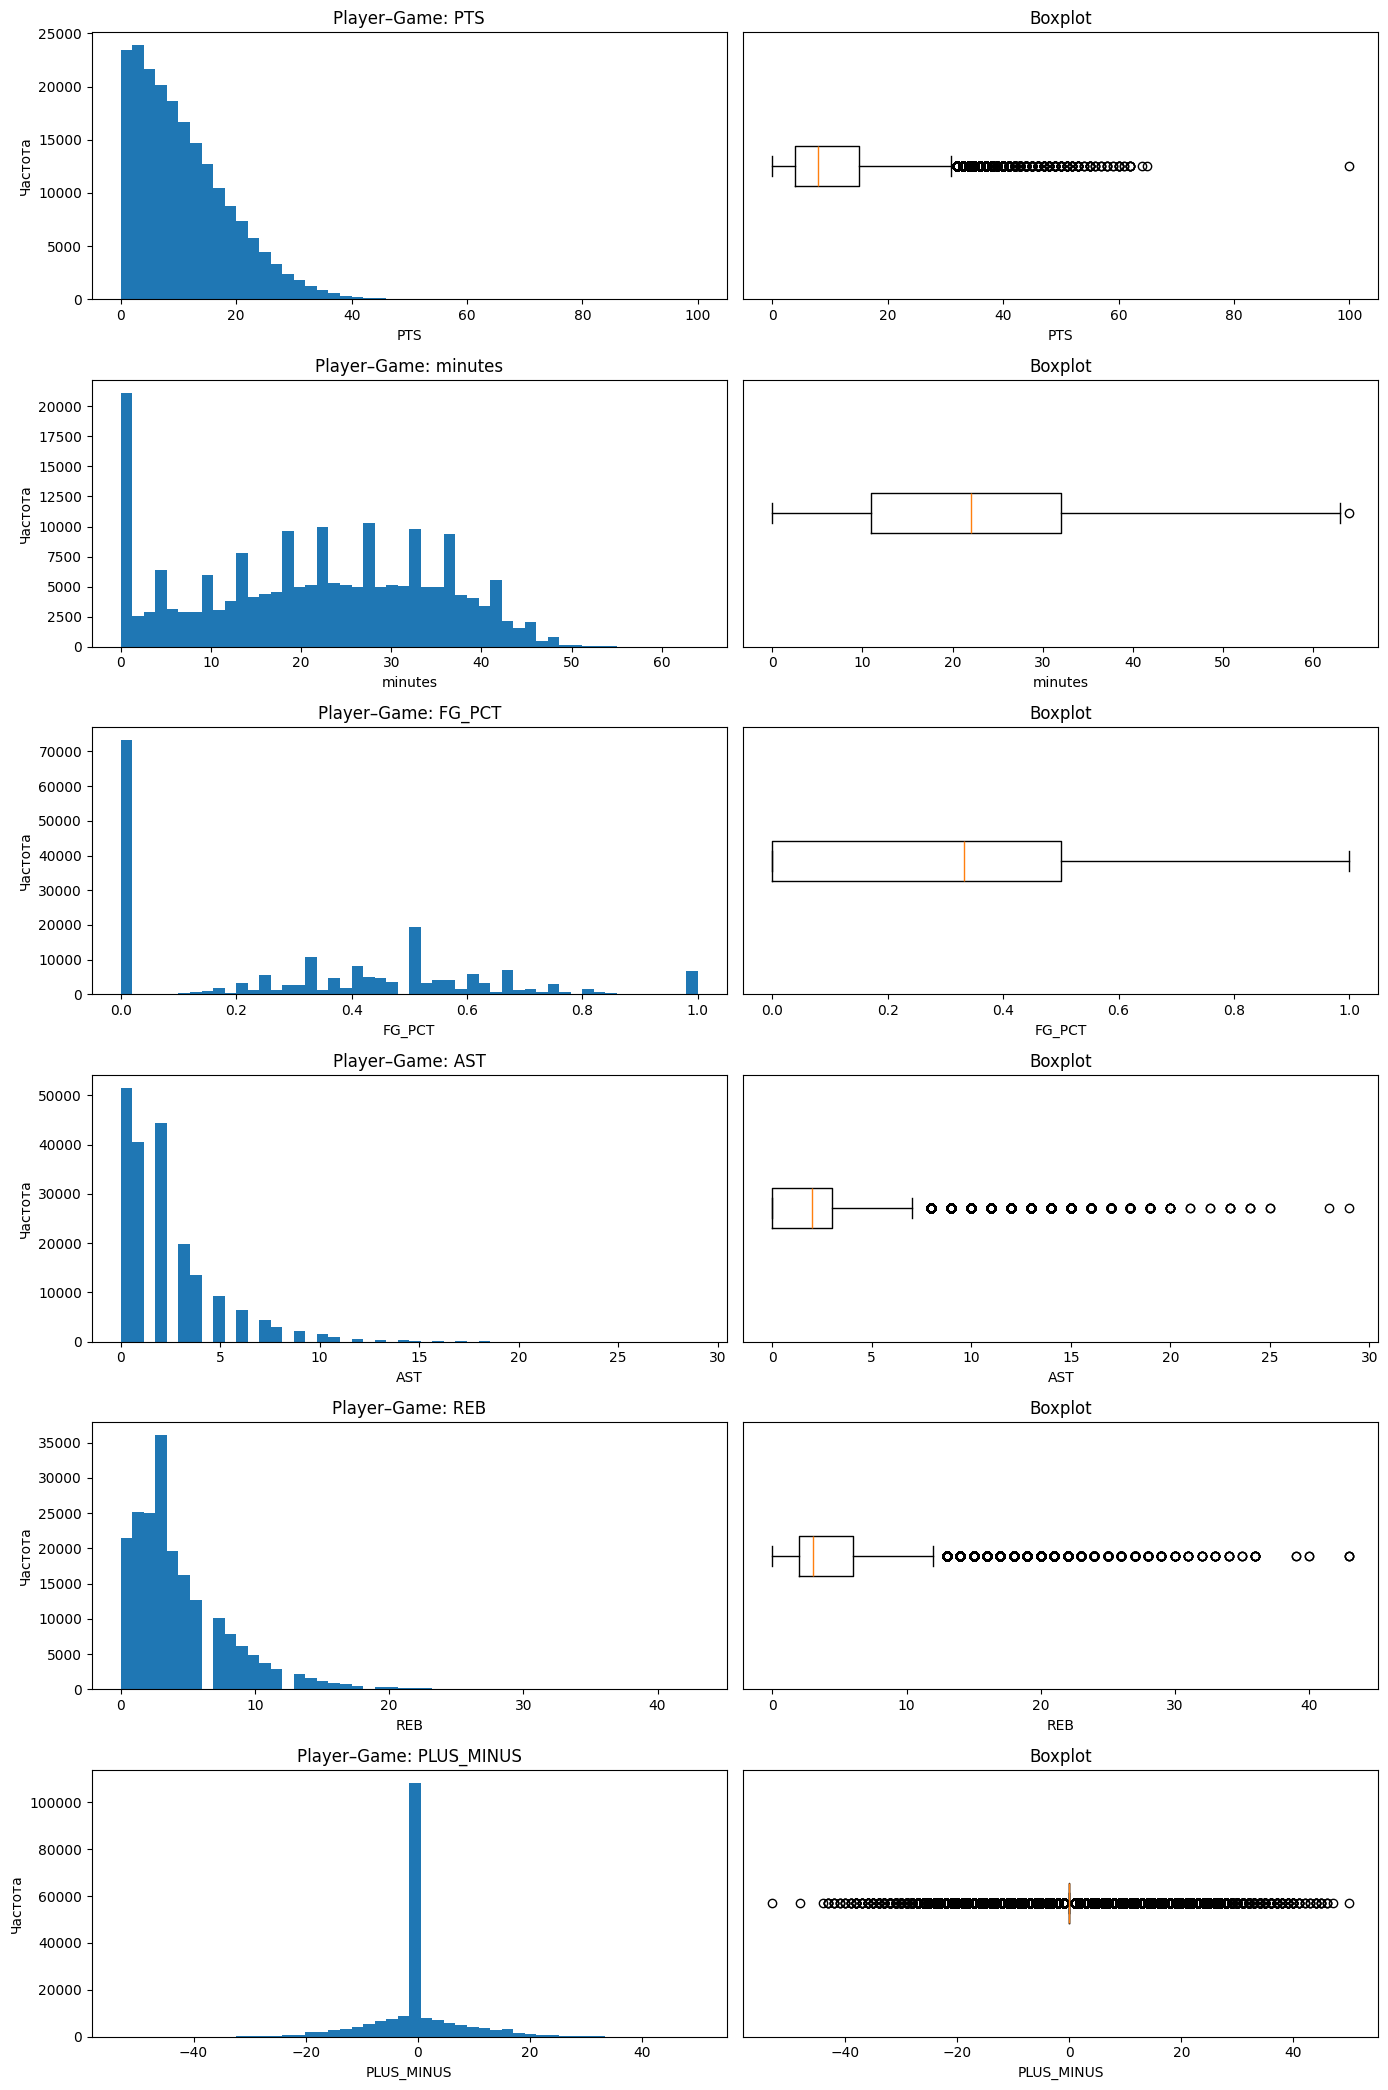

In [39]:
cols_game = ["PTS", "minutes", "FG_PCT", "AST", "REB", "PLUS_MINUS"]
plot_distributions_with_boxplot(player_game_df, cols_game, title_prefix="Player–Game: ", sample=200_000)

## Вывод:

Распределения ключевых игровых показателей на уровне «игрок–матч» характеризуются выраженной асимметрией и концентрацией значений в области низких уровней, что отражает преобладание ролевых игроков и ограниченное игровое время в отдельных матчах. Показатели результативности и активности имеют длинные правые хвосты, соответствующие редким высокоэффективным выступлениям, а распределение показателя PLUS_MINUS симметрично относительно нуля, что указывает на его зависимость от командного контекста.

## Игрок-сезон

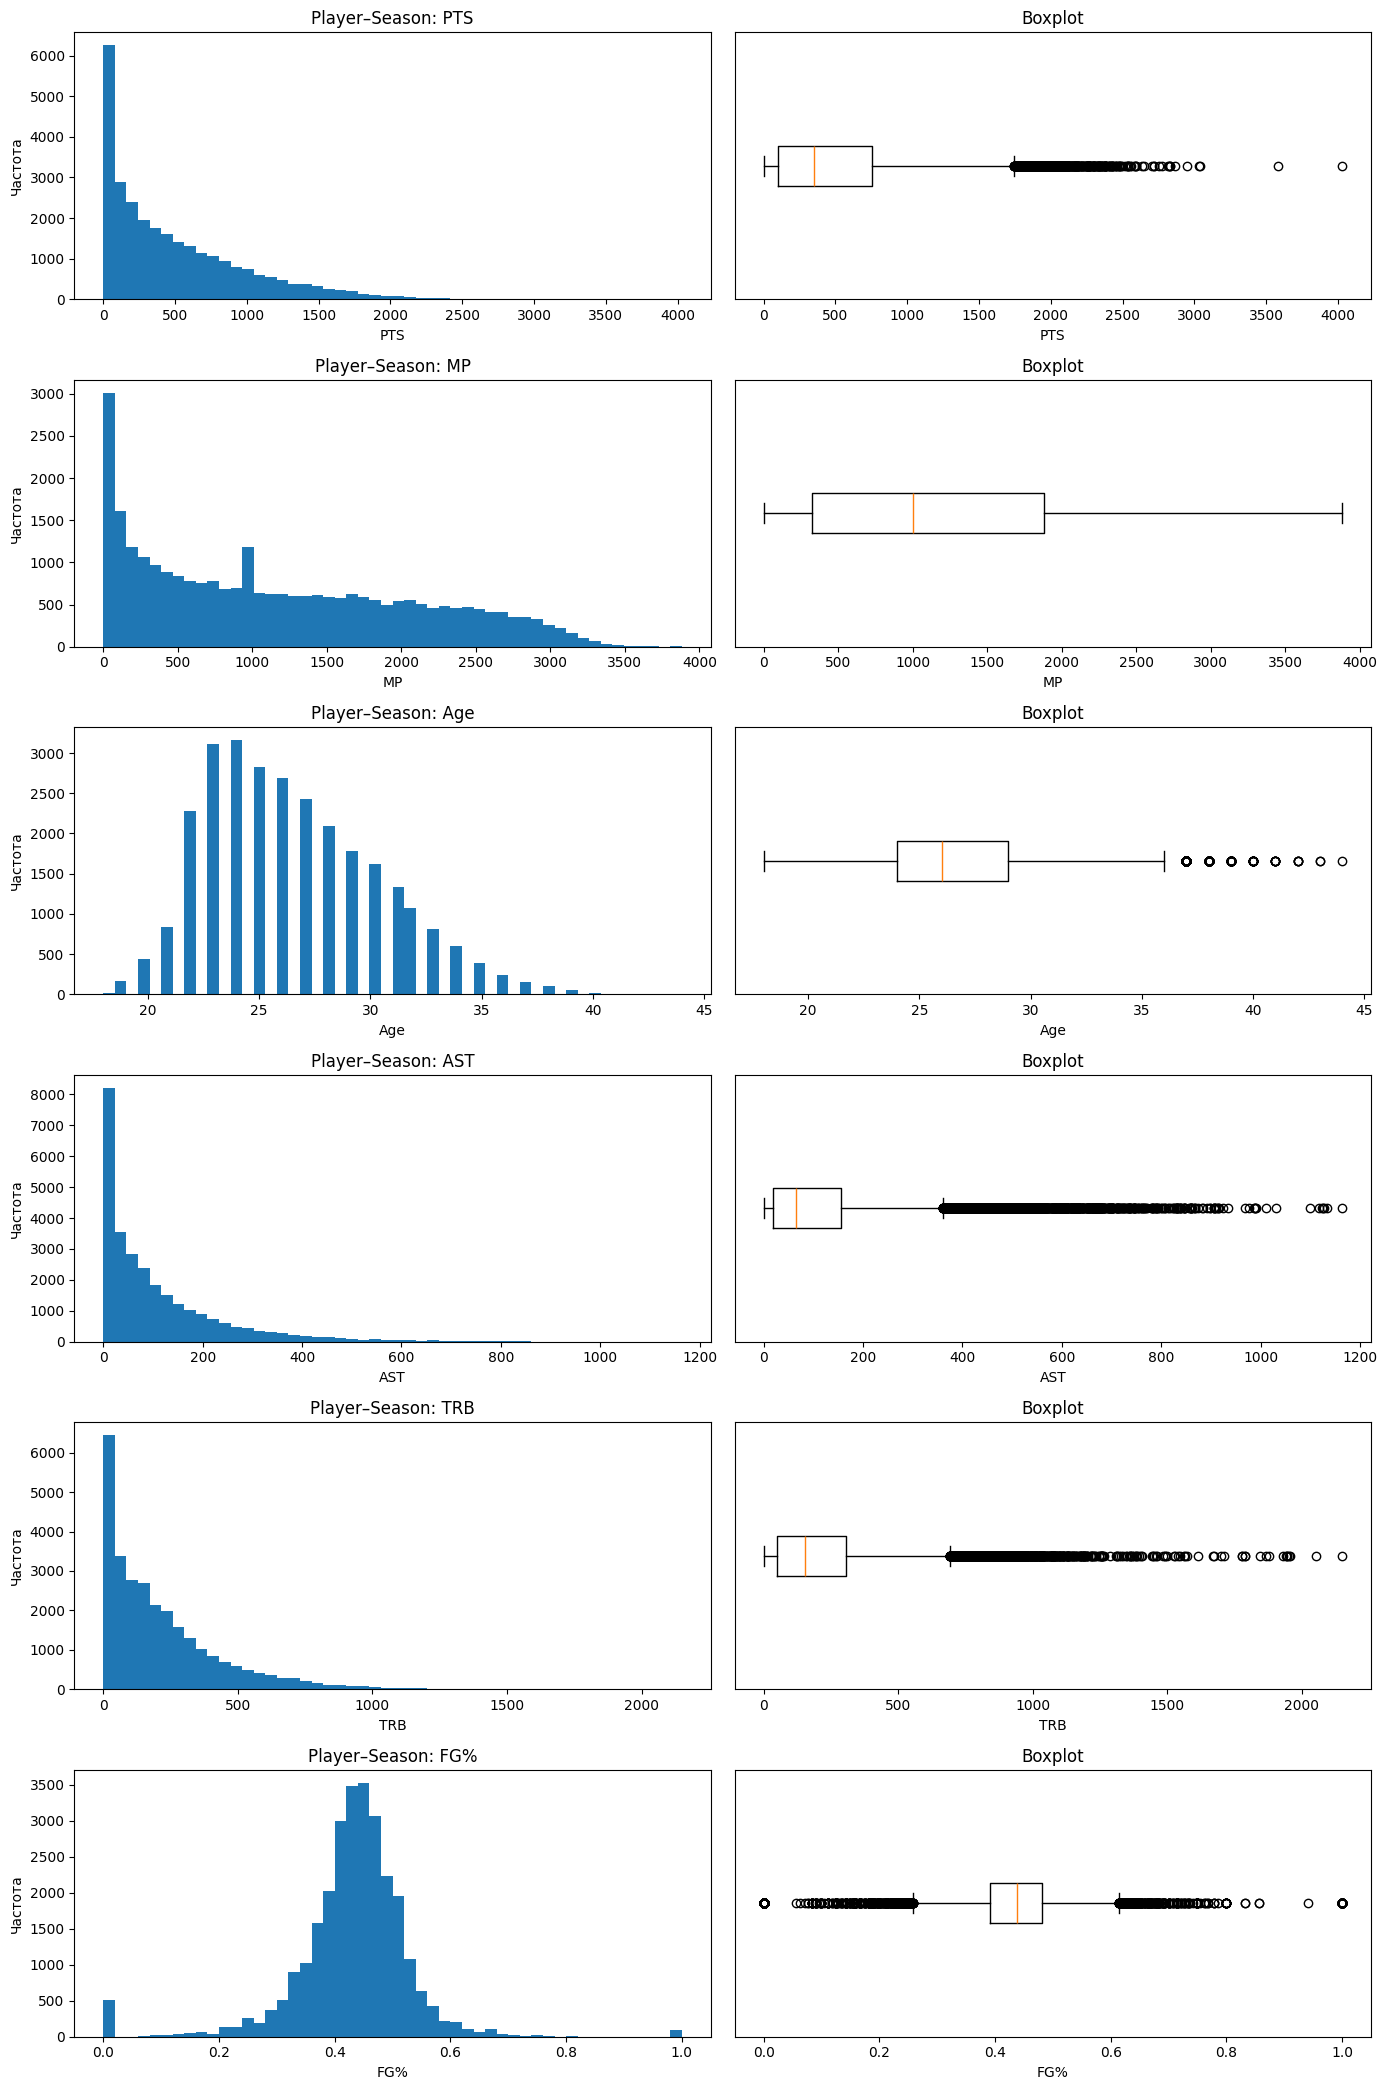

In [41]:
cols_season = ["PTS", "MP", "Age", "AST", "TRB", "FG%"]
plot_distributions_with_boxplot(player_season_df, cols_season, title_prefix="Player–Season: ")

## Вывод:

Распределения агрегированных сезонных показателей результативности и игровой активности имеют выраженную правостороннюю асимметрию, отражающую различия между ролевыми игроками и ведущими исполнителями. Возраст игроков характеризуется близким к нормальному распределением с максимумом в диапазоне 24–28 лет, что соответствует пику профессиональной карьеры, тогда как процент попаданий с игры имеет компактное распределение, ограниченное физическими пределами показателя.

# Корреляционный анализ показателей эффективности

Целью данного этапа является количественная оценка взаимосвязей между ключевыми показателями эффективности игроков на уровне сезона. Для анализа используются коэффициенты корреляции Пирсона (линейная зависимость) и Спирмена (ранговая зависимость, устойчивая к выбросам и асимметричным распределениям).

## Подготовка признаков

In [43]:
player_season_corr = player_season_df.copy()

player_season_corr["MP_per_game"] = player_season_corr["MP"] / player_season_corr["G"]
player_season_corr["Age_sq"] = player_season_corr["Age"] ** 2

corr_cols = [
    "PTS", "MP", "MP_per_game",
    "AST", "TRB",
    "FG%", "3P%", "FT%", "eFG%",
    "TOV", "PF",
    "Age", "Age_sq"
]

corr_data = player_season_corr[corr_cols]
corr_data.head()


,PTS,MP,MP_per_game,AST,TRB,FG%,3P%,FT%,eFG%,TOV,PF,Age,Age_sq
0,458.0,1000.0,15.873016,176.0,153.0,0.279,0.0,0.705,0.279,51.0,217.0,31.0,961.0
1,279.0,1000.0,20.408163,109.0,153.0,0.372,0.0,0.708,0.372,51.0,99.0,29.0,841.0
2,438.0,1000.0,14.925373,140.0,153.0,0.349,0.0,0.698,0.349,51.0,192.0,25.0,625.0
3,63.0,1000.0,66.666667,20.0,153.0,0.256,0.0,0.559,0.256,51.0,29.0,24.0,576.0
4,59.0,1000.0,76.923077,20.0,153.0,0.256,0.0,0.548,0.256,51.0,27.0,24.0,576.0


## Корреляции Пирсона

In [49]:
correlation_matrix = corr_data.corr(numeric_only=True)
correlation_matrix

,PTS,MP,MP_per_game,AST,TRB,FG%,3P%,FT%,eFG%,TOV,PF,Age,Age_sq
PTS,1.000000,0.922843,0.414236,0.719819,0.739074,0.291703,0.129582,0.331469,0.265951,0.788103,0.773276,0.031339,0.022301
MP,0.922843,1.000000,0.466896,0.749041,0.792226,0.300340,0.123746,0.340718,0.271158,0.790164,0.872997,0.066985,0.057821
MP_per_game,0.414236,0.466896,1.000000,0.338117,0.355059,0.113914,0.062375,0.173438,0.095952,0.370733,0.343382,0.056866,0.049864
AST,0.719819,0.749041,0.338117,1.000000,0.407543,0.162761,0.177420,0.297294,0.161683,0.732420,0.559756,0.072949,0.065058
TRB,0.739074,0.792226,0.355059,0.407543,1.000000,0.317056,-0.084449,0.166969,0.231188,0.574701,0.800729,0.030581,0.023968
FG%,0.291703,0.300340,0.113914,0.162761,0.317056,1.000000,0.078820,0.203508,0.893111,0.261751,0.319385,0.022011,0.020251
3P%,0.129582,0.123746,0.062375,0.177420,-0.084449,0.078820,1.000000,0.235581,0.313397,0.169905,-0.039973,0.065014,0.067360
FT%,0.331469,0.340718,0.173438,0.297294,0.166969,0.203508,0.235581,1.000000,0.198219,0.283705,0.276672,0.095973,0.092454
eFG%,0.265951,0.271158,0.095952,0.161683,0.231188,0.893111,0.313397,0.198219,1.000000,0.228459,0.234290,0.046928,0.046369
TOV,0.788103,0.790164,0.370733,0.732420,0.574701,0.261751,0.169905,0.283705,0.228459,1.000000,0.678820,0.004158,-0.001185


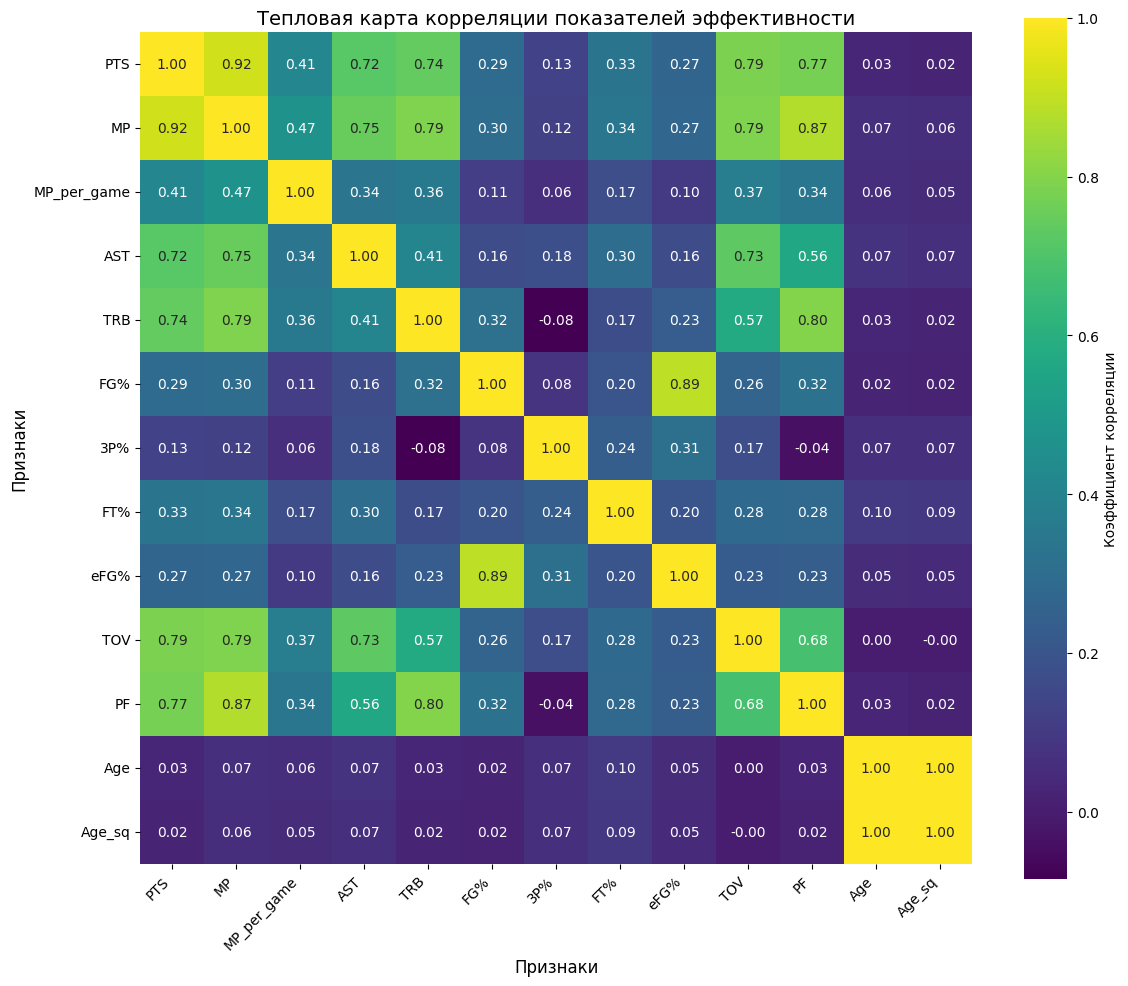

In [50]:
plt.figure(figsize=(12, 10))

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    square=True,
    cbar_kws={"label": "Коэффициент корреляции"}
)

plt.title("Тепловая карта корреляции показателей эффективности", fontsize=14)
plt.xlabel("Признаки", fontsize=12)
plt.ylabel("Признаки", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

## Вывод:

Корреляционный анализ по Пирсону выявил сильную линейную связь между результативностью игрока (`PTS`) и показателями объёма игровой активности (`MP`, `AST`, `TRB`), что указывает на доминирующее влияние времени участия в игре на итоговые сезонные показатели. Показатели бросковой эффективности (`FG%`, `3P%`, `FT%`, `eFG%`) демонстрируют умеренные или слабые корреляции с результативностью, отражая их относительную независимость от объёмных метрик. Возраст и его квадрат практически не коррелируют с игровыми показателями, что свидетельствует об отсутствии выраженной линейной зависимости между возрастом и эффективностью на уровне сезонов.


In [51]:
correlation_matrix_spearman = corr_data.corr(method="spearman", numeric_only=True)
correlation_matrix_spearman

,PTS,MP,MP_per_game,AST,TRB,FG%,3P%,FT%,eFG%,TOV,PF,Age,Age_sq
PTS,1.000000,0.965702,0.850120,0.883258,0.875478,0.391913,0.208218,0.361282,0.360558,0.852179,0.887450,0.076485,0.076485
MP,0.965702,1.000000,0.871206,0.888133,0.902042,0.356206,0.177799,0.307879,0.320096,0.853510,0.915498,0.103990,0.103990
MP_per_game,0.850120,0.871206,1.000000,0.789111,0.765029,0.303095,0.204710,0.323032,0.296200,0.745502,0.727859,0.151662,0.151662
AST,0.883258,0.888133,0.789111,1.000000,0.711034,0.233679,0.263082,0.383034,0.234446,0.819815,0.779039,0.123409,0.123409
TRB,0.875478,0.902042,0.765029,0.711034,1.000000,0.429143,0.012107,0.146293,0.318583,0.767295,0.914736,0.074309,0.074309
FG%,0.391913,0.356206,0.303095,0.233679,0.429143,1.000000,0.010317,0.033325,0.834872,0.329938,0.376130,0.028235,0.028235
3P%,0.208218,0.177799,0.204710,0.263082,0.012107,0.010317,1.000000,0.335144,0.377880,0.188782,0.015156,0.071877,0.071877
FT%,0.361282,0.307879,0.323032,0.383034,0.146293,0.033325,0.335144,1.000000,0.143304,0.275135,0.191583,0.147869,0.147869
eFG%,0.360558,0.320096,0.296200,0.234446,0.318583,0.834872,0.377880,0.143304,1.000000,0.280679,0.261311,0.062882,0.062882
TOV,0.852179,0.853510,0.745502,0.819815,0.767295,0.329938,0.188782,0.275135,0.280679,1.000000,0.789728,0.047046,0.047046


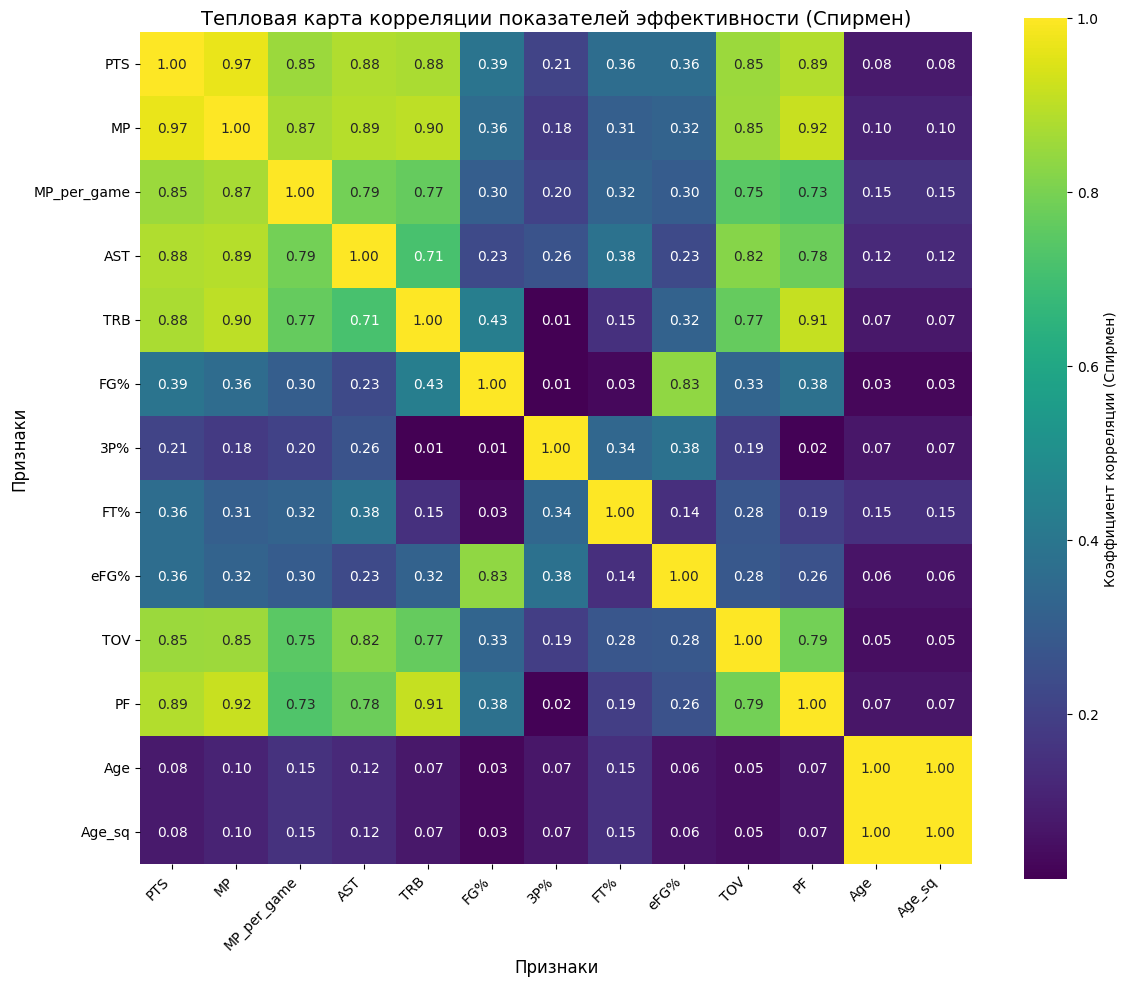

In [53]:
plt.figure(figsize=(12, 10))

sns.heatmap(
    correlation_matrix_spearman,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    square=True,
    cbar_kws={"label": "Коэффициент корреляции (Спирмен)"}
)

plt.title("Тепловая карта корреляции показателей эффективности (Спирмен)", fontsize=14)
plt.xlabel("Признаки", fontsize=12)
plt.ylabel("Признаки", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

## Вывод:

Корреляционный анализ по Спирмену показал значительно более высокие и устойчивые зависимости между результативностью и показателями игровой активности, включая нормализованные метрики (`MP_per_game`), что подтверждает монотонный характер этих связей при наличии асимметричных распределений и выбросов. Показатели бросковой эффективности сохраняют умеренные корреляции с результативностью, тогда как возрастной фактор остаётся вторичным и не определяет уровень эффективности игрока. Сходство структуры корреляций между основными показателями подтверждает устойчивость выявленных закономерностей.

## Итоговое сравнение:

Сравнение корреляций Пирсона и Спирмена показывает, что зависимости между результативностью и объёмом игровой активности носят устойчивый монотонный характер и усиливаются при учёте негауссовых распределений, тогда как показатели бросковой эффективности и возраст оказывают вторичное влияние.

# Формирование финального набора признаков

## Игрок-сезон

In [56]:
player_season_df = player_season_df.copy()
player_season_df["MP_per_game"] = player_season_df["MP"] / player_season_df["G"]

In [57]:
final_features = [
    "PTS",
    "MP_per_game",
    "AST",
    "TRB",
    "eFG%",
    "3P%",
    "FT%",
    "TOV",
    "PF",
    "Age"
]

player_season_final = player_season_df[final_features].dropna()
player_season_final.head()

,PTS,MP_per_game,AST,TRB,eFG%,3P%,FT%,TOV,PF,Age
0,458.0,15.873016,176.0,153.0,0.279,0.0,0.705,51.0,217.0,31.0
1,279.0,20.408163,109.0,153.0,0.372,0.0,0.708,51.0,99.0,29.0
2,438.0,14.925373,140.0,153.0,0.349,0.0,0.698,51.0,192.0,25.0
3,63.0,66.666667,20.0,153.0,0.256,0.0,0.559,51.0,29.0,24.0
4,59.0,76.923077,20.0,153.0,0.256,0.0,0.548,51.0,27.0,24.0


## Игрок-матч

In [59]:
player_game_df = player_game_df.copy()

per_min_cols = ["PTS", "AST", "REB", "TOV", "PF"]
for col in per_min_cols:
    player_game_df[f"{col}_per_min"] = (
        player_game_df[col] / player_game_df["minutes"].replace(0, pd.NA)
    )

In [60]:
game_features = [
    "minutes",
    "PTS_per_min",
    "AST_per_min",
    "REB_per_min",
    "FG_PCT",
    "FG3_PCT",
    "FT_PCT",
    "TOV_per_min",
    "PF_per_min",
    "PLUS_MINUS"
]

player_game_final = player_game_df[game_features].dropna()
player_game_final.head()

,minutes,PTS_per_min,AST_per_min,REB_per_min,FG_PCT,FG3_PCT,FT_PCT,TOV_per_min,PF_per_min,PLUS_MINUS
31352,38,0.5,0.236842,0.078947,0.0,0.0,0.0,0.026316,0.078947,0.0
31365,23,0.434783,0.130435,0.130435,0.0,0.0,0.4,0.043478,0.043478,0.0
31368,3,1.333333,0.0,1.0,0.0,0.0,0.0,0.333333,1.0,0.0
31374,16,0.25,0.125,0.1875,0.0,0.0,0.0,0.0625,0.1875,0.0
31438,27,0.148148,0.0,0.333333,0.0,0.0,0.0,0.037037,0.148148,0.0


# Сохранение датасетов

In [61]:
player_season_final.to_csv("player_season_final.csv", index=False)

In [62]:
player_game_final.to_csv("player_game_final.csv", index=False)